In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_59.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_41.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_61.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_46.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_66.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_98.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_11.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_73.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_22.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_27.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_76.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_114.jpg
/kaggle/input/smallfishclassification/SmallFishBD/val/Tengra/Tengra_43.jpg
/kaggle/input/smallfishc

In [2]:
# ================================
# BASIC LIBRARIES
# ================================
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ================================
# TENSORFLOW / KERAS
# ================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,
    MaxPooling2D, InputLayer
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

# ================================
# TRANSFER LEARNING MODELS
# ================================
from tensorflow.keras.applications import (
    MobileNetV2, ResNet50V2, EfficientNetB0
)
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

# ================================
# SKLEARN METRICS
# ================================
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report,
    precision_recall_fscore_support,
    roc_curve, auc
)

# ================================
# DISPLAY SETTINGS
# ================================
plt.style.use("ggplot")
np.set_printoptions(suppress=True)

print("All required libraries successfully loaded!")


2025-11-22 13:05:26.408433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763816726.673679      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763816726.745512      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

All required libraries successfully loaded!


In [3]:
# ================================
# 2. Path setup
# ================================
BASE_DIR = "/kaggle/input/smallfishclassification/SmallFishBD"  # 👈 change if needed

train_dir = os.path.join(BASE_DIR, "train")
val_dir   = os.path.join(BASE_DIR, "val")
test_dir  = os.path.join(BASE_DIR, "test")

print("Train dir:", train_dir)
print("Val dir  :", val_dir)
print("Test dir :", test_dir)

classes = sorted(os.listdir(train_dir))
print("Classes:", classes)
num_classes = len(classes)


Train dir: /kaggle/input/smallfishclassification/SmallFishBD/train
Val dir  : /kaggle/input/smallfishclassification/SmallFishBD/val
Test dir : /kaggle/input/smallfishclassification/SmallFishBD/test
Classes: ['Bele', 'Chela', 'Guchi', 'Kachki', 'Kata Phasa', 'Mola', 'Nama Chanda', 'Pabda', 'Puti', 'Tengra']


In [4]:
import random
import matplotlib.pyplot as plt
import os
import glob

def show_random_images(split_dir, split_name):
    classes = sorted(os.listdir(split_dir))

    print(f"\nShowing random images from {split_name} directory:\n")
    
    plt.figure(figsize=(14, 4))

    for i, cls in enumerate(classes):
        class_path = os.path.join(split_dir, cls)

        # find all image files inside this class folder
        img_files = glob.glob(os.path.join(class_path, "*.jpg")) + \
                    glob.glob(os.path.join(class_path, "*.png")) + \
                    glob.glob(os.path.join(class_path, "*.jpeg"))
        
        if len(img_files) == 0:
            print(f"No images found in class: {cls}")
            continue
        
        # pick random image
        img_path = random.choice(img_files)
        img = plt.imread(img_path)

        plt.subplot(1, len(classes), i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")

    plt.suptitle(f"Random images from {split_name} set", fontsize=14)
    plt.tight_layout()
    plt.show()



Showing random images from TRAIN directory:



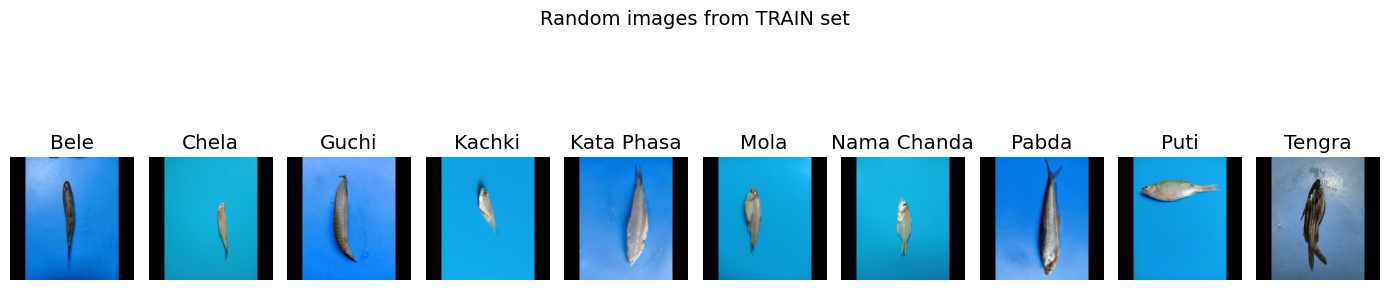


Showing random images from VALIDATION directory:



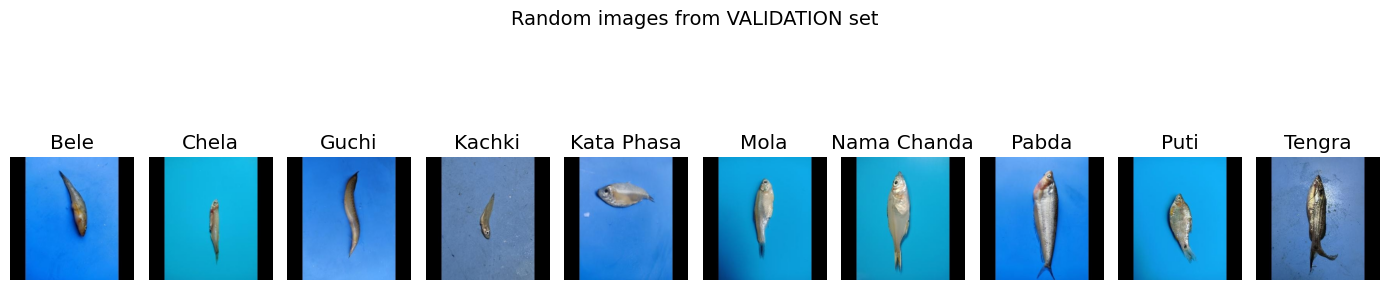


Showing random images from TEST directory:



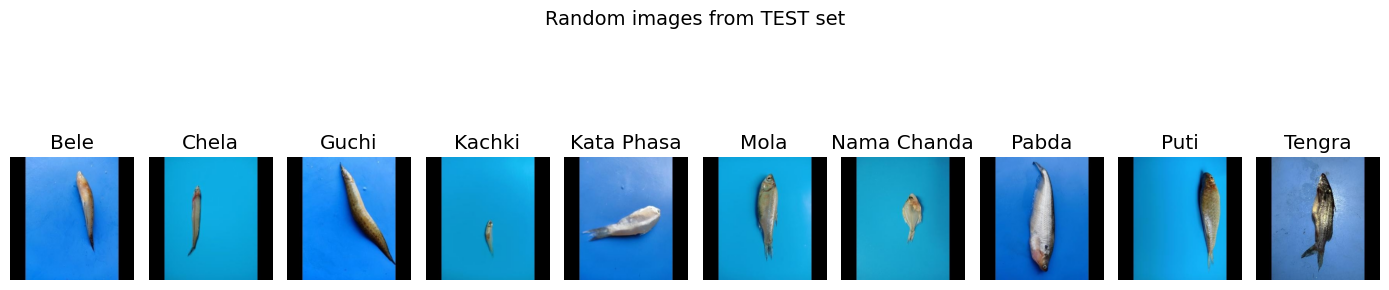

In [5]:
# TRAIN folder
show_random_images(train_dir, "TRAIN")

# VALIDATION folder
show_random_images(val_dir, "VALIDATION")

# TEST folder
show_random_images(test_dir, "TEST")


In [6]:
# ================================
# 3.1 Class-wise image count
# ================================
def count_images(folder):
    class_counts = {}
    for cls in classes:
        cls_path = os.path.join(folder, cls)
        img_files = glob.glob(os.path.join(cls_path, "*.jpg")) + \
                    glob.glob(os.path.join(cls_path, "*.png")) + \
                    glob.glob(os.path.join(cls_path, "*.jpeg"))
        class_counts[cls] = len(img_files)
    return class_counts

train_counts = count_images(train_dir)
val_counts   = count_images(val_dir)
test_counts  = count_images(test_dir)

print("Train counts:", train_counts)
print("Val counts  :", val_counts)
print("Test counts :", test_counts)


Train counts: {'Bele': 164, 'Chela': 152, 'Guchi': 131, 'Kachki': 197, 'Kata Phasa': 103, 'Mola': 143, 'Nama Chanda': 88, 'Pabda': 100, 'Puti': 174, 'Tengra': 106}
Val counts  : {'Bele': 20, 'Chela': 19, 'Guchi': 16, 'Kachki': 24, 'Kata Phasa': 12, 'Mola': 17, 'Nama Chanda': 11, 'Pabda': 12, 'Puti': 21, 'Tengra': 13}
Test counts : {'Bele': 21, 'Chela': 19, 'Guchi': 17, 'Kachki': 26, 'Kata Phasa': 14, 'Mola': 19, 'Nama Chanda': 11, 'Pabda': 13, 'Puti': 23, 'Tengra': 14}


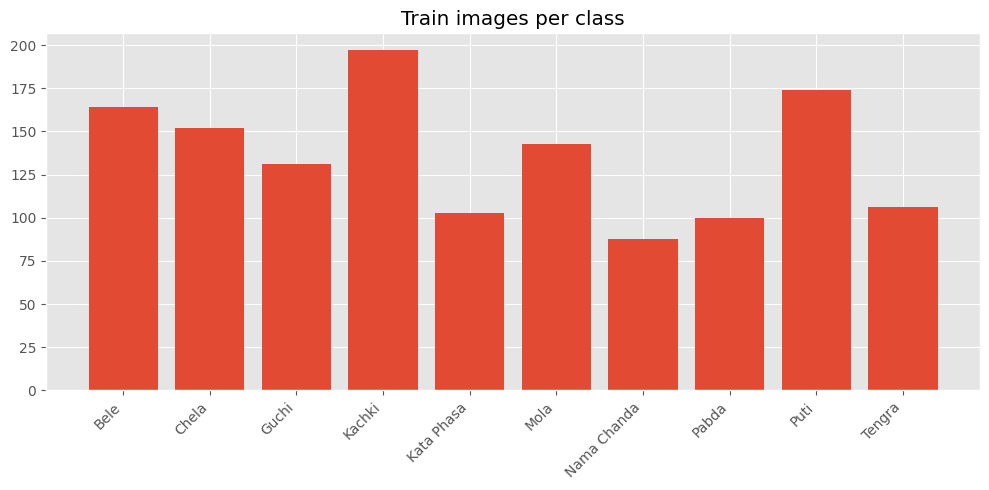

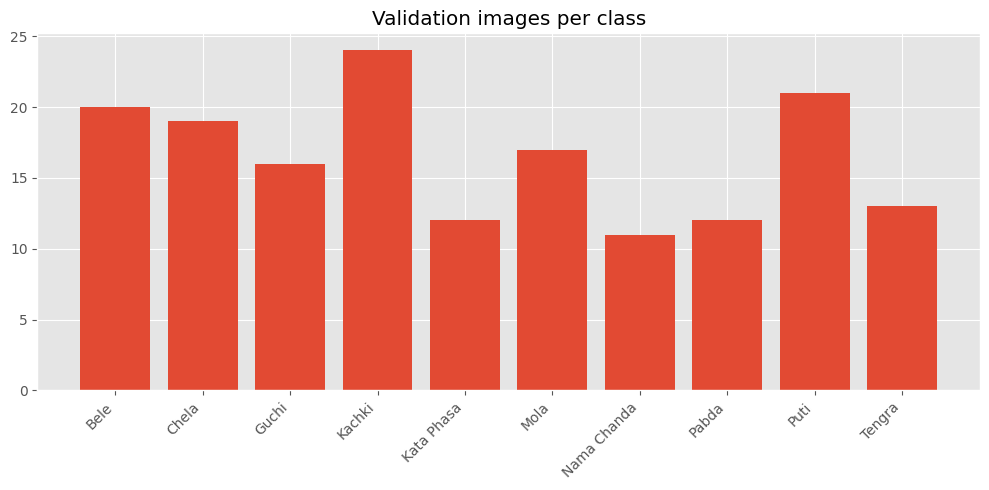

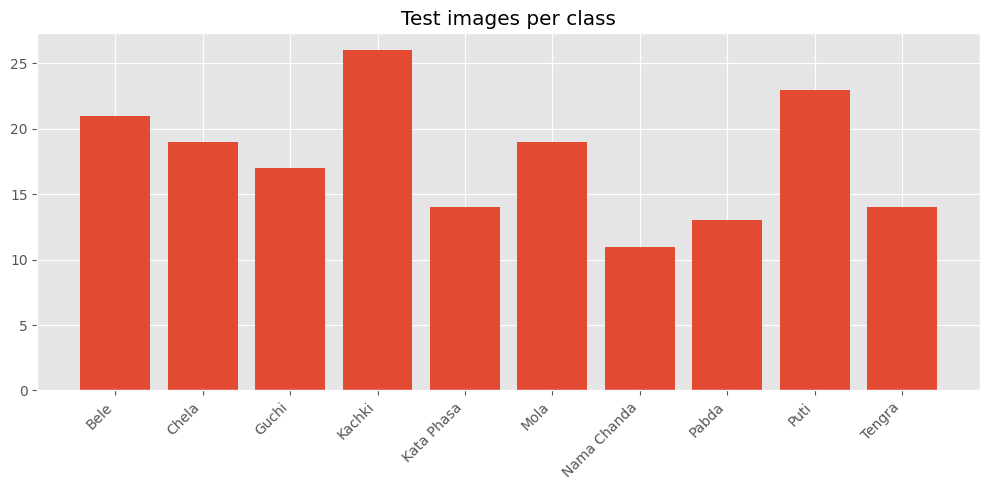

In [7]:
# ================================
# 3.2 Bar plot of train counts
# ================================
plt.figure(figsize=(10,5))
plt.bar(train_counts.keys(), train_counts.values())
plt.xticks(rotation=45, ha="right")
plt.title("Train images per class")
plt.tight_layout()
plt.show()



plt.figure(figsize=(10,5))
plt.bar(val_counts.keys(), val_counts.values())
plt.xticks(rotation=45, ha="right")
plt.title("Validation images per class")
plt.tight_layout()
plt.show()



plt.figure(figsize=(10,5))
plt.bar(test_counts.keys(), test_counts.values())
plt.xticks(rotation=45, ha="right")
plt.title("Test images per class")
plt.tight_layout()
plt.show()


In [8]:
from PIL import Image
import os

def check_image_sizes(folder):
    sizes = {}
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, f)
                with Image.open(path) as img:
                    w, h = img.size   # (width, height)
                sizes[(w, h)] = sizes.get((w, h), 0) + 1
    return sizes

sizes = check_image_sizes(BASE_DIR)
print("Unique sizes (width, height) and counts:")
for s, c in sizes.items():
    print(s, "=>", c, "images")


Unique sizes (width, height) and counts:
(320, 320) => 1700 images


In [9]:
from PIL import Image
import hashlib
import glob
import os
import matplotlib.pyplot as plt
import numpy as np


In [10]:
from PIL import Image
import os

def check_image_sizes(folder):
    sizes = {}
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, f)
                with Image.open(path) as img:
                    w, h = img.size   # (width, height)
                sizes[(w, h)] = sizes.get((w, h), 0) + 1
    return sizes

sizes = check_image_sizes(BASE_DIR)
print("Unique sizes (width, height) and counts:")
for s, c in sizes.items():
    print(s, "=>", c, "images")


Unique sizes (width, height) and counts:
(320, 320) => 1700 images


In [11]:
# 2. Class-wise count + percentage (train/val/test)

def class_count_dict(folder):
    counts = {}
    for cls in sorted(os.listdir(folder)):
        cls_path = os.path.join(folder, cls)
        if not os.path.isdir(cls_path):
            continue
        imgs = glob.glob(os.path.join(cls_path, "*.jpg")) + \
               glob.glob(os.path.join(cls_path, "*.png")) + \
               glob.glob(os.path.join(cls_path, "*.jpeg"))
        counts[cls] = len(imgs)
    return counts

train_counts = class_count_dict(train_dir)
val_counts   = class_count_dict(val_dir)
test_counts  = class_count_dict(test_dir)

import pandas as pd

df_train = pd.DataFrame({
    "class": list(train_counts.keys()),
    "train_count": list(train_counts.values())
})
df_train["train_pct"] = df_train["train_count"] / df_train["train_count"].sum() * 100

df_val = pd.DataFrame({
    "class": list(val_counts.keys()),
    "val_count": list(val_counts.values())
})
df_val["val_pct"] = df_val["val_count"] / df_val["val_count"].sum() * 100

df_test = pd.DataFrame({
    "class": list(test_counts.keys()),
    "test_count": list(test_counts.values())
})
df_test["test_pct"] = df_test["test_count"] / df_test["test_count"].sum() * 100

df_merged = df_train.merge(df_val, on="class").merge(df_test, on="class")
df_merged


class  train_count  train_pct  val_count    val_pct  test_count  \
0         Bele          164  12.076583         20  12.121212          21   
1        Chela          152  11.192931         19  11.515152          19   
2        Guchi          131   9.646539         16   9.696970          17   
3       Kachki          197  14.506627         24  14.545455          26   
4   Kata Phasa          103   7.584683         12   7.272727          14   
5         Mola          143  10.530191         17  10.303030          19   
6  Nama Chanda           88   6.480118         11   6.666667          11   
7        Pabda          100   7.363770         12   7.272727          13   
8         Puti          174  12.812960         21  12.727273          23   
9       Tengra          106   7.805596         13   7.878788          14   

    test_pct  
0  11.864407  
1  10.734463  
2   9.604520  
3  14.689266  
4   7.909605  
5  10.734463  
6   6.214689  
7   7.344633  
8  12.994350  
9   7.909605

In [12]:
# 3. Corrupt image check (BASE_DIR er vitore sob image)

def find_corrupt_images(root_folder):
    corrupt_files = []
    for root, dirs, files in os.walk(root_folder):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, f)
                try:
                    with Image.open(path) as img:
                        img.verify()  # just verify
                except Exception as e:
                    print("Corrupt:", path, "| Error:", e)
                    corrupt_files.append(path)
    return corrupt_files

corrupt_list = find_corrupt_images(BASE_DIR)
print("\nTotal corrupt images found:", len(corrupt_list))



Total corrupt images found: 0


In [13]:
import hashlib
from PIL import Image
import os
import glob

def find_duplicate_images(root_folder):
    hash_dict = {}       # hash → list of file paths
    duplicates = []      # list of duplicate file paths

    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                file_path = os.path.join(root, file)

                try:
                    with Image.open(file_path) as img:
                        img_bytes = img.tobytes()  # convert image to raw bytes
                        file_hash = hashlib.md5(img_bytes).hexdigest()
                except:
                    print("Error reading:", file_path)
                    continue

                # store hash
                if file_hash in hash_dict:
                    hash_dict[file_hash].append(file_path)
                else:
                    hash_dict[file_hash] = [file_path]

    # collect duplicates
    for h, paths in hash_dict.items():
        if len(paths) > 1:
            duplicates.append(paths)

    return duplicates


In [14]:
duplicates = find_duplicate_images(BASE_DIR)

print("Total duplicate groups found:", len(duplicates))


Total duplicate groups found: 3


In [15]:
for i, group in enumerate(duplicates):
    print(f"\nDuplicate Group {i+1}:")
    for img_path in group:
        print("  ", img_path)



Duplicate Group 1:
   /kaggle/input/smallfishclassification/SmallFishBD/test/Pabda/Pabda_23.jpg
   /kaggle/input/smallfishclassification/SmallFishBD/train/Pabda/Pabda_75.jpg

Duplicate Group 2:
   /kaggle/input/smallfishclassification/SmallFishBD/test/Pabda/Pabda_72.jpg
   /kaggle/input/smallfishclassification/SmallFishBD/train/Pabda/Pabda_29.jpg

Duplicate Group 3:
   /kaggle/input/smallfishclassification/SmallFishBD/train/Pabda/Pabda_22.jpg
   /kaggle/input/smallfishclassification/SmallFishBD/train/Pabda/Pabda_98.jpg



Showing duplicate group 1


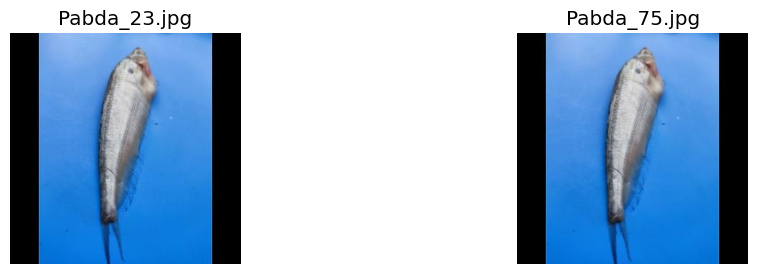


Showing duplicate group 2


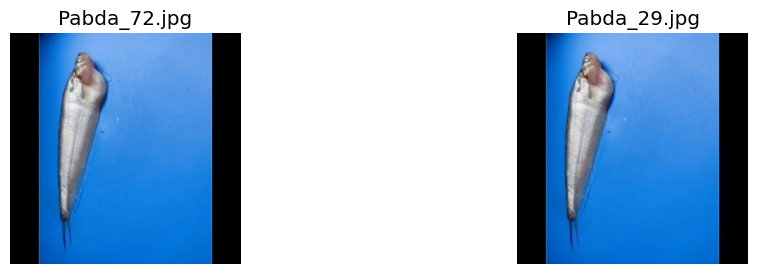


Showing duplicate group 3


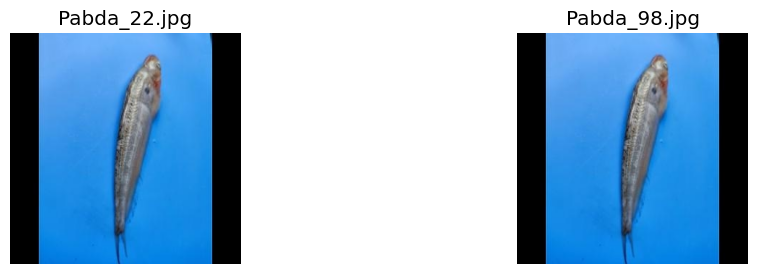

In [16]:
import matplotlib.pyplot as plt

for i, group in enumerate(duplicates):
    print(f"\nShowing duplicate group {i+1}")
    
    plt.figure(figsize=(12, 3))
    for j, img_path in enumerate(group):
        img = plt.imread(img_path)
        plt.subplot(1, len(group), j+1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis("off")
    plt.show()


In [17]:
# 4. RGB vs Grayscale image check

def check_channels(root_folder):
    rgb_count = 0
    gray_count = 0
    other_count = 0

    for root, dirs, files in os.walk(root_folder):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, f)
                img = plt.imread(path)

                if img.ndim == 2:
                    gray_count += 1
                elif img.ndim == 3:
                    if img.shape[2] == 3:
                        rgb_count += 1
                    else:
                        other_count += 1

    print("RGB images      :", rgb_count)
    print("Grayscale images:", gray_count)
    print("Other (e.g. RGBA):", other_count)

check_channels(BASE_DIR)


RGB images      : 1700
Grayscale images: 0
Other (e.g. RGBA): 0


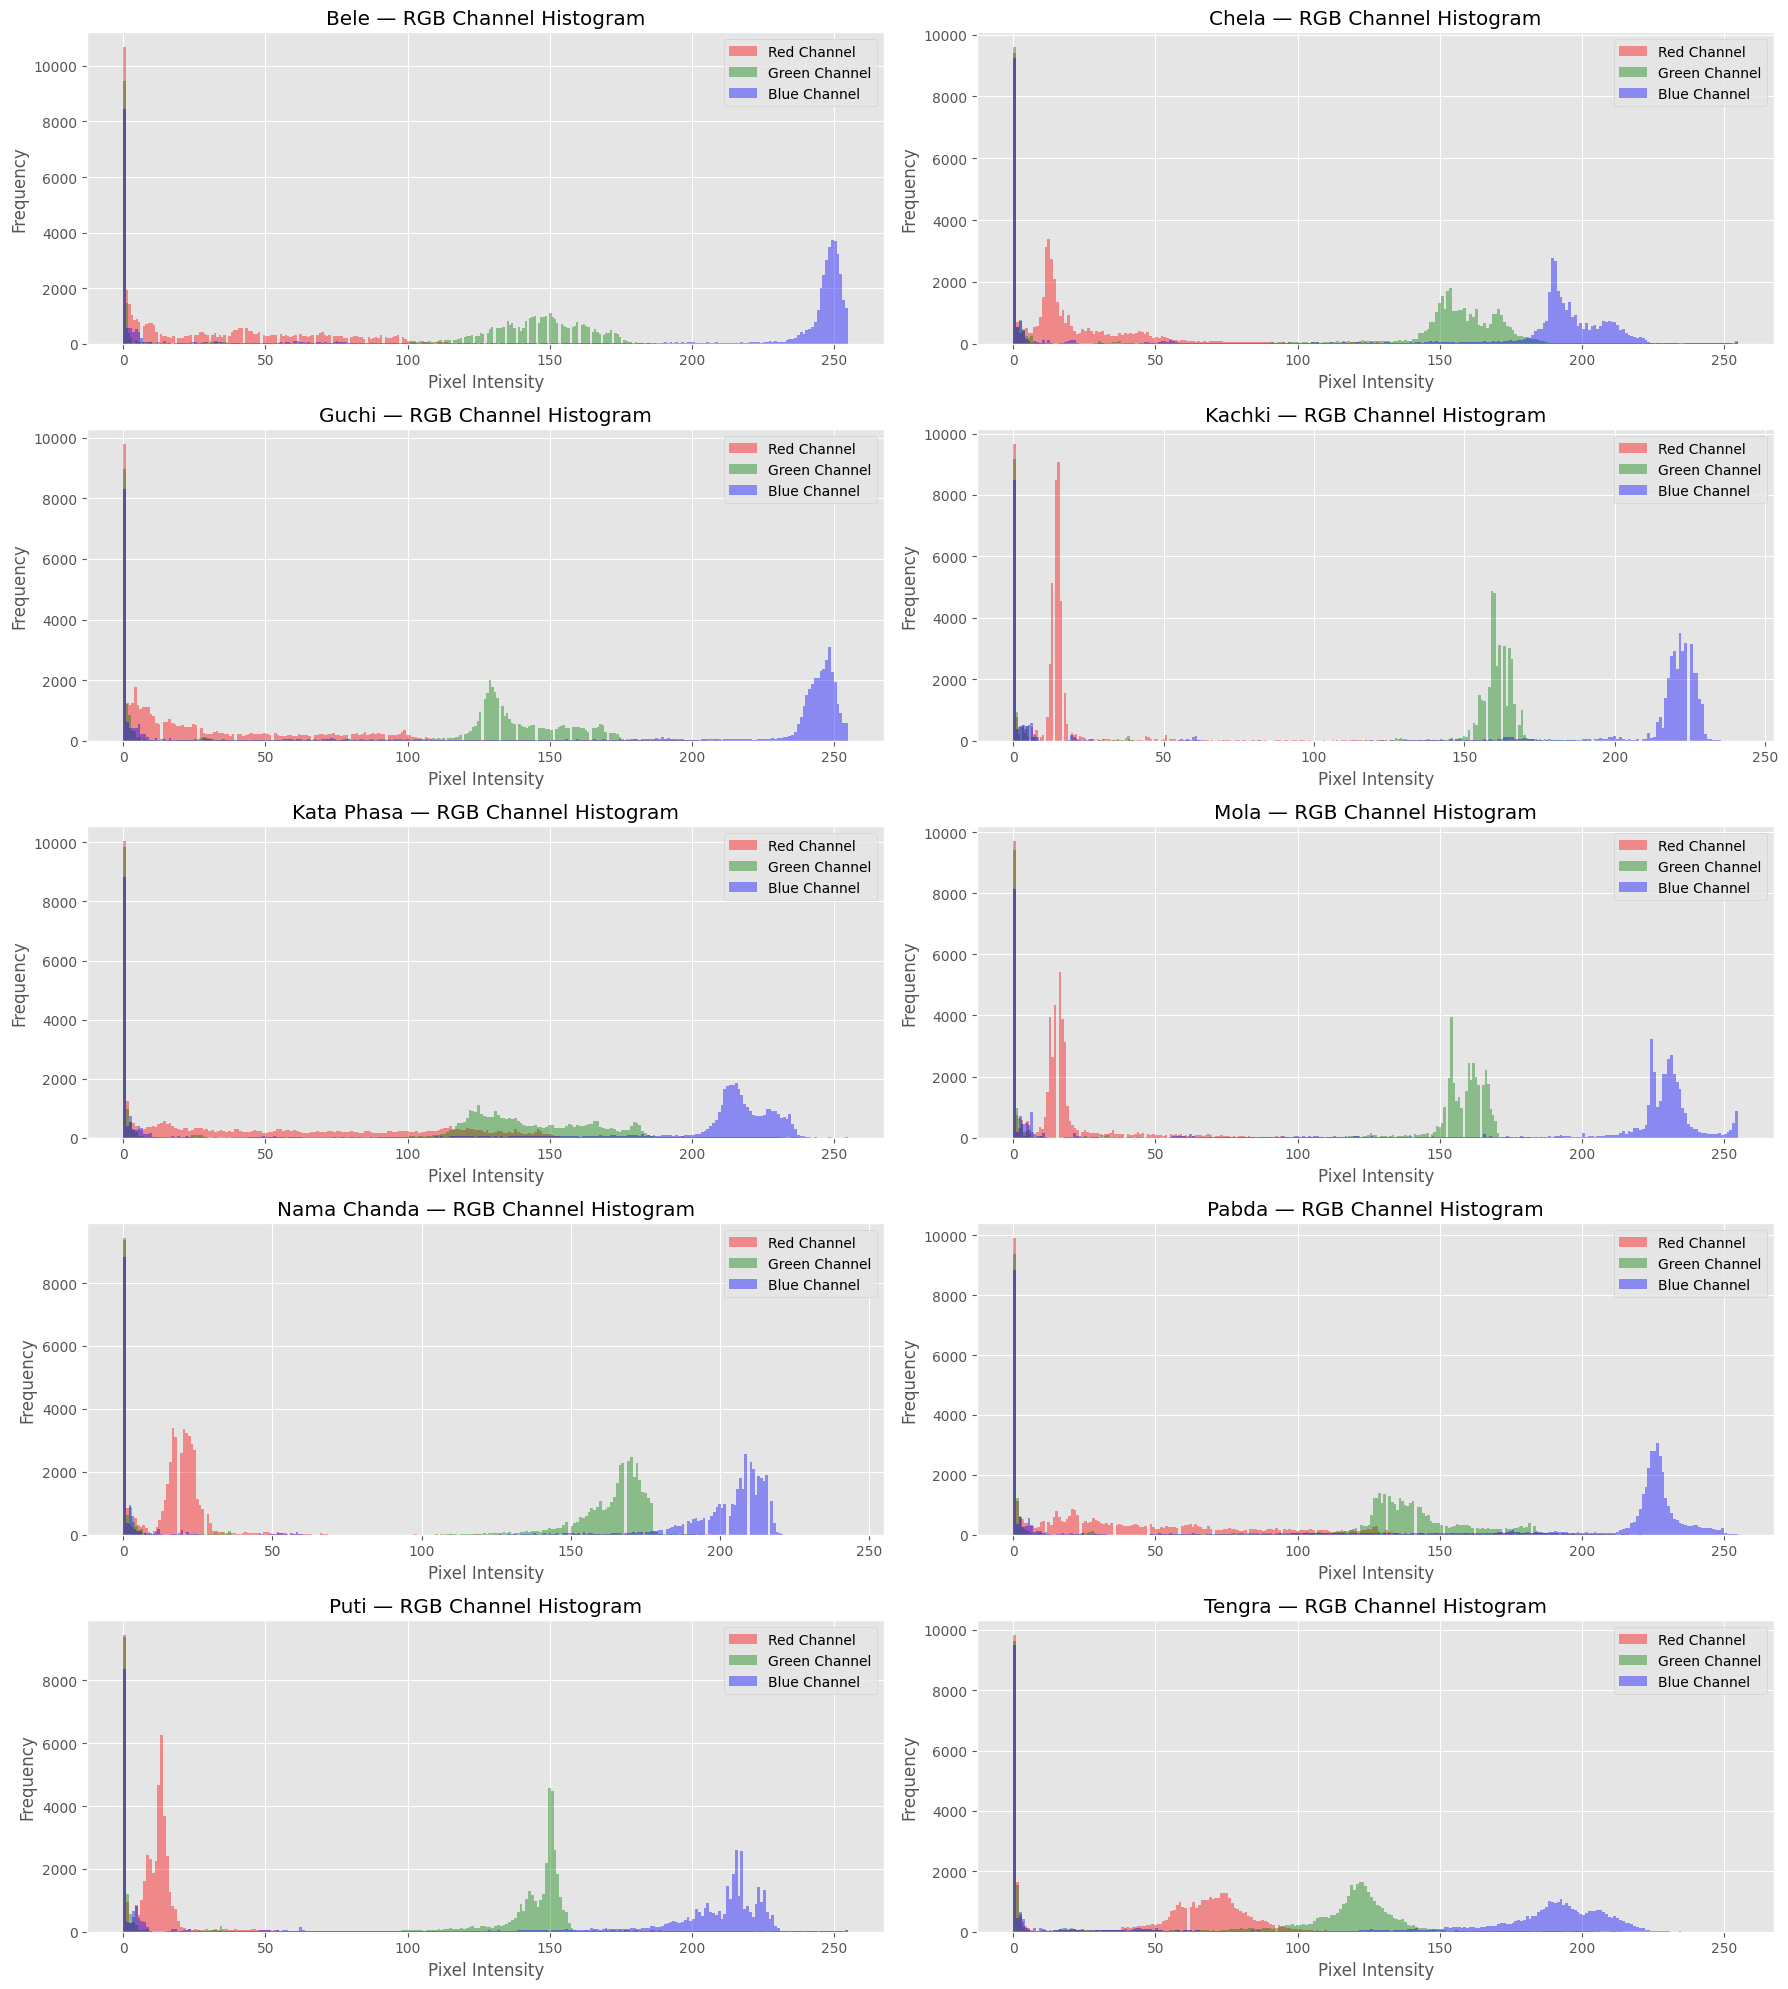

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---- MODIFY THIS TO YOUR DATASET ----
DATASET_DIR = "/kaggle/working/SmallFishBD_clean/test"  # Your test folder path

# ---- Get class folder names ----
classes = sorted(os.listdir(DATASET_DIR))

# ---- Plot Setup ----
plt.figure(figsize=(18, 20))  # adjust height/width for your report

plot_idx = 1

for cls in classes:
    cls_path = os.path.join(DATASET_DIR, cls)

    # pick one sample image from each class
    img_name = os.listdir(cls_path)[0]
    img_path = os.path.join(cls_path, img_name)

    # read image using OpenCV
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # separate color channels
    red = img_rgb[:, :, 0].flatten()
    green = img_rgb[:, :, 1].flatten()
    blue = img_rgb[:, :, 2].flatten()

    # ---- Subplot for current class ----
    plt.subplot(5, 2, plot_idx)  # 10 classes → 5 rows x 2 columns
    plot_idx += 1

    plt.hist(red, bins=256, color='red', alpha=0.4, label="Red Channel")
    plt.hist(green, bins=256, color='green', alpha=0.4, label="Green Channel")
    plt.hist(blue, bins=256, color='blue', alpha=0.4, label="Blue Channel")

    plt.title(f"{cls} — RGB Channel Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


Unique sizes (width, height) and counts:
(320, 320) => 1700 images


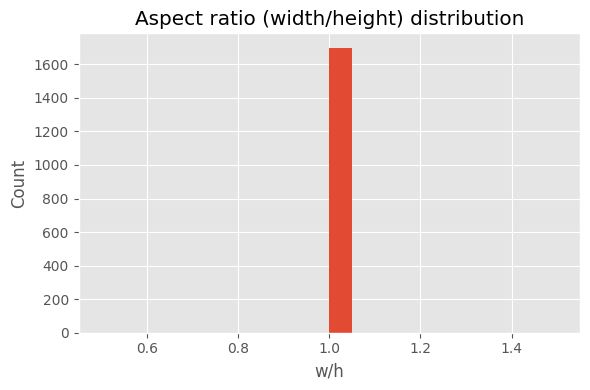

In [20]:
# 5. Unique size & aspect ratio distribution

from collections import Counter

def image_sizes_and_aspect(folder):
    size_counter = Counter()
    ratio_list = []

    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, f)
                with Image.open(path) as img:
                    w, h = img.size
                size_counter[(w, h)] += 1
                ratio_list.append(w / h)

    print("Unique sizes (width, height) and counts:")
    for (w, h), c in size_counter.items():
        print(f"({w}, {h}) => {c} images")

    plt.figure(figsize=(6,4))
    plt.hist(ratio_list, bins=20)
    plt.title("Aspect ratio (width/height) distribution")
    plt.xlabel("w/h")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

image_sizes_and_aspect(BASE_DIR)


In [21]:
# 6. Total image count per split

def split_total(folder):
    total = 0
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                total += 1
    return total

total_train = split_total(train_dir)
total_val   = split_total(val_dir)
total_test  = split_total(test_dir)

print("Total train images:", total_train)
print("Total val images  :", total_val)
print("Total test images :", total_test)

total_all = total_train + total_val + total_test
print("\nPercentage:")
print("Train: {:.2f}%".format(total_train / total_all * 100))
print("Val  : {:.2f}%".format(total_val   / total_all * 100))
print("Test : {:.2f}%".format(total_test  / total_all * 100))


Total train images: 1358
Total val images  : 165
Total test images : 177

Percentage:
Train: 79.88%
Val  : 9.71%
Test : 10.41%


Preprocessing Part Start Here

In [23]:
import shutil, os

SRC = "/kaggle/input/smallfishclassification/SmallFishBD"
DEST = "/kaggle/working/SmallFishBD_clean"

# Copy original dataset into writable directory
shutil.copytree(SRC, DEST, dirs_exist_ok=True)

print("Copied dataset to:", DEST)


Copied dataset to: /kaggle/working/SmallFishBD_clean


In [24]:
deleted_count = 0

for group in duplicates:         # each group = [original, duplicate1, duplicate2 ...]
    for dup_path in group[1:]:   # skip original, delete only duplicates
        
        # Map duplicate path from input to working directory
        rel = os.path.relpath(dup_path, SRC)
        dup_working = os.path.join(DEST, rel)

        # Delete if exists in working directory
        if os.path.exists(dup_working):
            os.remove(dup_working)
            print("Deleted duplicate:", dup_working)
            deleted_count += 1
        else:
            print("Not found in working directory:", dup_working)

print("\nTotal duplicate images removed:", deleted_count)


Deleted duplicate: /kaggle/working/SmallFishBD_clean/train/Pabda/Pabda_75.jpg
Deleted duplicate: /kaggle/working/SmallFishBD_clean/train/Pabda/Pabda_29.jpg
Deleted duplicate: /kaggle/working/SmallFishBD_clean/train/Pabda/Pabda_98.jpg

Total duplicate images removed: 3


In [26]:
import hashlib

def verify_no_duplicates(root):
    seen = {}
    dup = 0

    for root_dir, _, files in os.walk(root):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root_dir, f)
                img = Image.open(path).convert("RGB")
                h = hashlib.md5(img.tobytes()).hexdigest()
                if h in seen:
                    dup += 1
                else:
                    seen[h] = True
    return dup

print("Remaining duplicates in clean dataset:", verify_no_duplicates(DEST))


Remaining duplicates in clean dataset: 0


✅ Resize done. Total images resized: 1697


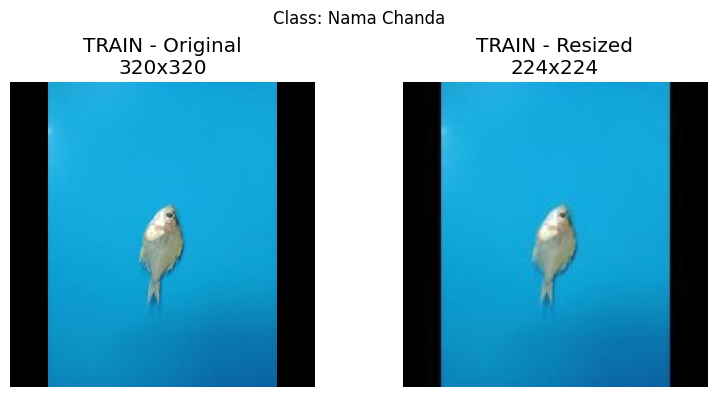

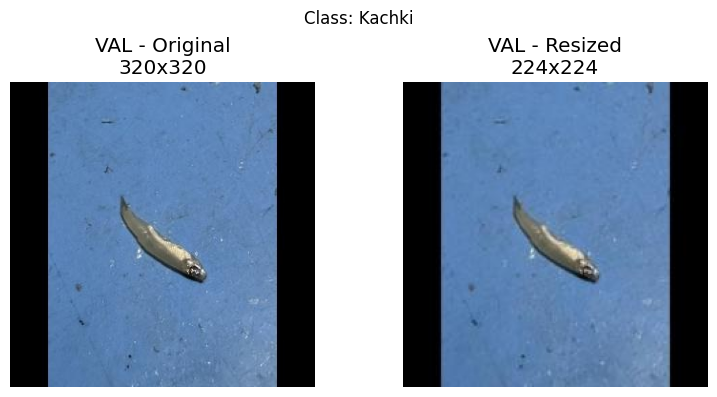

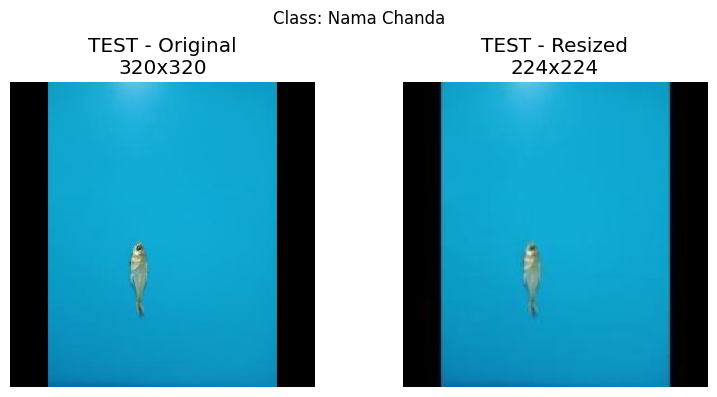

In [28]:
import os, random
from PIL import Image
import matplotlib.pyplot as plt

# --- TOMAR PATH ---
SRC  = "/kaggle/input/smallfishclassification/SmallFishBD"      # original (read-only)
DEST = "/kaggle/working/SmallFishBD_clean"                      # working / clean copy
TARGET_SIZE = (224, 224)

# =============== 1) RESIZE ALL IMAGES IN WORKING DIRECTORY ===============

def resize_all_images(root_dir, target_size=(224, 224)):
    total = 0
    for split in ["train", "val", "test"]:
        split_dir = os.path.join(root_dir, split)
        if not os.path.exists(split_dir):
            continue

        for cls in os.listdir(split_dir):
            cls_path = os.path.join(split_dir, cls)
            if not os.path.isdir(cls_path):
                continue

            for f in os.listdir(cls_path):
                if f.lower().endswith((".jpg", ".jpeg", ".png")):
                    path = os.path.join(cls_path, f)
                    try:
                        img = Image.open(path).convert("RGB")
                        img = img.resize(target_size, Image.Resampling.BILINEAR)
                        img.save(path)   # working directory te overwrite
                        total += 1
                    except Exception as e:
                        print("Error resizing:", path, "=>", e)
    print("✅ Resize done. Total images resized:", total)

resize_all_images(DEST, TARGET_SIZE)

# =============== 2) SHOW COMPARISON FOR EACH SPLIT =======================

def show_random_compare(split_name):
    """split_name: 'train'/'val'/'test'"""
    src_split  = os.path.join(SRC,  split_name)
    dest_split = os.path.join(DEST, split_name)

    # random class
    classes = [c for c in os.listdir(src_split) if os.path.isdir(os.path.join(src_split, c))]
    cls = random.choice(classes)

    # random image inside that class
    cls_src_path = os.path.join(src_split, cls)
    files = [f for f in os.listdir(cls_src_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    img_name = random.choice(files)

    # full paths: original & resized
    src_img_path  = os.path.join(cls_src_path, img_name)
    dest_img_path = os.path.join(dest_split, cls, img_name)

    # load images
    orig  = Image.open(src_img_path).convert("RGB")
    resized = Image.open(dest_img_path).convert("RGB")

    # plot
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(orig)
    plt.title(f"{split_name.upper()} - Original\n{orig.size[0]}x{orig.size[1]}")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(resized)
    plt.title(f"{split_name.upper()} - Resized\n{resized.size[0]}x{resized.size[1]}")
    plt.axis("off")

    plt.suptitle(f"Class: {cls}")
    plt.tight_layout()
    plt.show()

# train, val, test theke comparison dekhabo
for split in ["train", "val", "test"]:
    show_random_compare(split)


Saving brightness-augmented images to: /kaggle/working/SmallFishBD_clean_brightness/train
Total augmented images saved: 2710


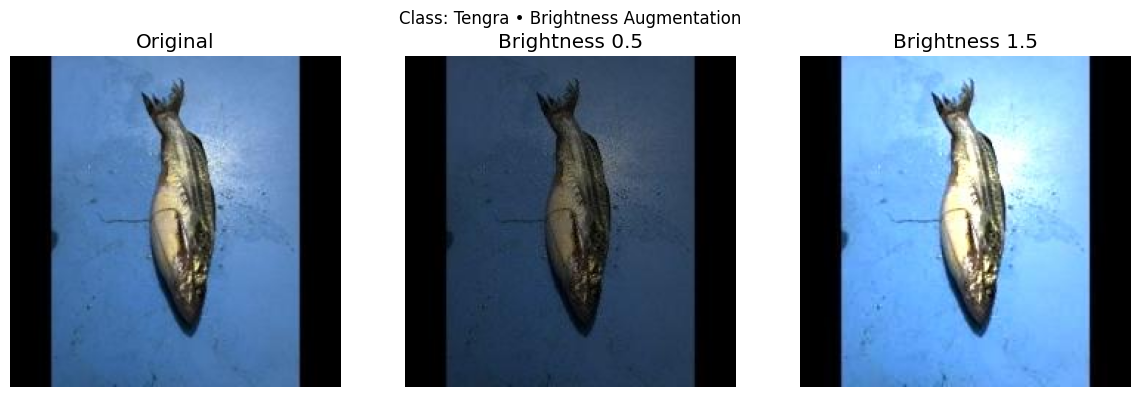

In [29]:
import os, random, shutil
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# ---------- PATHS ----------
RESIZED_BASE   = "/kaggle/working/SmallFishBD_clean"
SRC_TRAIN      = os.path.join(RESIZED_BASE, "train")

BRIGHT_ROOT    = "/kaggle/working/SmallFishBD_clean_brightness"
BRIGHT_TRAIN   = os.path.join(BRIGHT_ROOT, "train")

# ---------- 1) CREATE BRIGHTNESS DATASET IF NOT EXISTS ----------
if os.path.exists(BRIGHT_ROOT):
    shutil.rmtree(BRIGHT_ROOT)          # fresh start (optional)
os.makedirs(BRIGHT_TRAIN, exist_ok=True)

# create class folders
for cls in os.listdir(SRC_TRAIN):
    cls_path = os.path.join(SRC_TRAIN, cls)
    if os.path.isdir(cls_path):
        os.makedirs(os.path.join(BRIGHT_TRAIN, cls), exist_ok=True)

print("Saving brightness-augmented images to:", BRIGHT_TRAIN)

count = 0
for cls in os.listdir(SRC_TRAIN):
    cls_src = os.path.join(SRC_TRAIN, cls)
    if not os.path.isdir(cls_src):
        continue
    cls_dest = os.path.join(BRIGHT_TRAIN, cls)

    for fname in os.listdir(cls_src):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(cls_src, fname)
            img = Image.open(img_path).convert("RGB")
            enhancer = ImageEnhance.Brightness(img)

            dark   = enhancer.enhance(0.5)
            bright = enhancer.enhance(1.5)

            base, ext = os.path.splitext(fname)
            dark.save(os.path.join(cls_dest,   f"{base}_dark{ext}"))
            bright.save(os.path.join(cls_dest, f"{base}_bright{ext}"))
            count += 2

print("Total augmented images saved:", count)

# ---------- 2) SHOW COMPARISON (ORIGINAL vs DARK vs BRIGHT) ----------
def show_brightness_example():
    classes = [c for c in os.listdir(BRIGHT_TRAIN)
               if os.path.isdir(os.path.join(BRIGHT_TRAIN, c))]
    cls = random.choice(classes)
    cls_bright = os.path.join(BRIGHT_TRAIN, cls)

    dark_files = [f for f in os.listdir(cls_bright) if "_dark" in f]
    dark_name = random.choice(dark_files)

    base, ext = os.path.splitext(dark_name.replace("_dark", ""))
    orig_path   = os.path.join(SRC_TRAIN, cls, base + ext)
    dark_path   = os.path.join(cls_bright, dark_name)
    bright_path = os.path.join(cls_bright, base + "_bright" + ext)

    orig   = Image.open(orig_path).convert("RGB")
    dark   = Image.open(dark_path).convert("RGB")
    bright = Image.open(bright_path).convert("RGB")

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.imshow(orig);   plt.title("Original");        plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(dark);   plt.title("Brightness 0.5");  plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(bright); plt.title("Brightness 1.5");  plt.axis("off")
    plt.suptitle(f"Class: {cls} • Brightness Augmentation")
    plt.tight_layout()
    plt.show()

show_brightness_example()


In [30]:
import os, random, shutil
from PIL import Image
import matplotlib.pyplot as plt

# ----------- PATHS -----------
BRIGHT_BASE   = "/kaggle/working/SmallFishBD_clean_brightness/train"
ROTATE_ROOT   = "/kaggle/working/SmallFishBD_clean_rotation"
ROTATE_TRAIN  = os.path.join(ROTATE_ROOT, "train")

ANGLES = [30, 45, 60, 90, 180]

# ---------- 1) PREPARE OUTPUT FOLDER ----------
if os.path.exists(ROTATE_ROOT):
    shutil.rmtree(ROTATE_ROOT)

os.makedirs(ROTATE_TRAIN, exist_ok=True)

# create class folders
for cls in os.listdir(BRIGHT_BASE):
    cls_path = os.path.join(BRIGHT_BASE, cls)
    if os.path.isdir(cls_path):
        os.makedirs(os.path.join(ROTATE_TRAIN, cls), exist_ok=True)

print("Saving rotation-augmented images to:", ROTATE_TRAIN)

# ---------- 2) APPLY ROTATION AUGMENTATION ----------
total_saved = 0

for cls in os.listdir(BRIGHT_BASE):
    cls_path = os.path.join(BRIGHT_BASE, cls)
    if not os.path.isdir(cls_path):
        continue

    dest_cls = os.path.join(ROTATE_TRAIN, cls)

    for fname in os.listdir(cls_path):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):

            img_path = os.path.join(cls_path, fname)
            img = Image.open(img_path).convert("RGB")
            base, ext = os.path.splitext(fname)

            for angle in ANGLES:
                rotated = img.rotate(angle, expand=True)
                save_name = f"{base}_rot{angle}{ext}"
                rotated.save(os.path.join(dest_cls, save_name))
                total_saved += 1

print("\n✅ Rotation Augmentation Completed!")
print("Total rotated images saved:", total_saved)


Saving rotation-augmented images to: /kaggle/working/SmallFishBD_clean_rotation/train

✅ Rotation Augmentation Completed!
Total rotated images saved: 13550


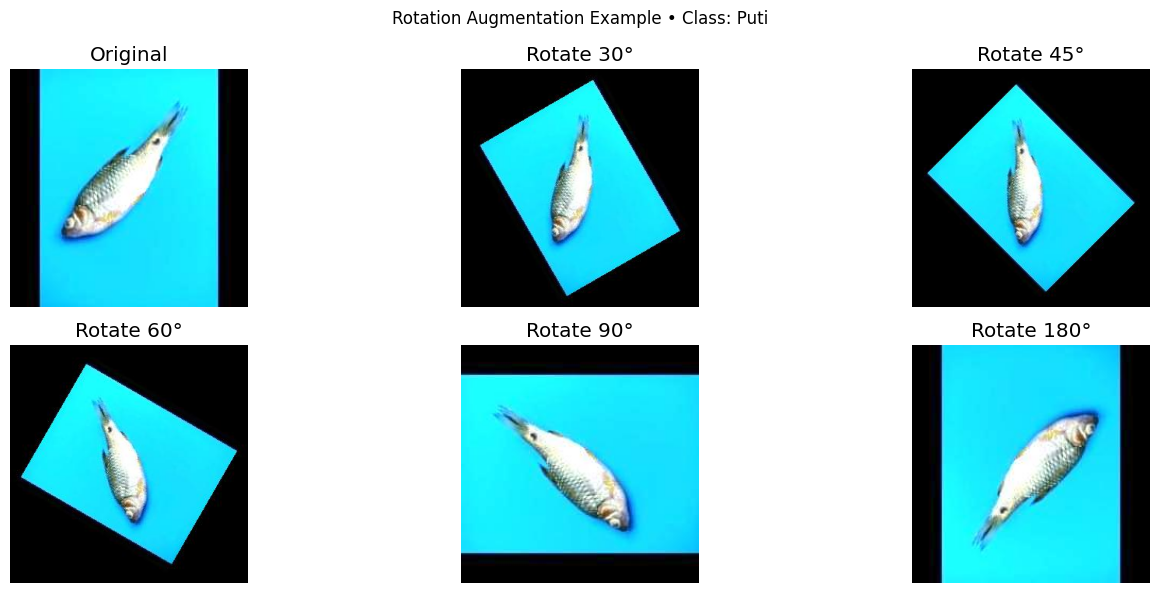

In [31]:
def show_rotation_example():
    # pick random class
    classes = [c for c in os.listdir(BRIGHT_BASE) if os.path.isdir(os.path.join(BRIGHT_BASE, c))]
    cls = random.choice(classes)

    # pick random brightness image (base image)
    cls_src = os.path.join(BRIGHT_BASE, cls)
    files = [f for f in os.listdir(cls_src) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    fname = random.choice(files)

    original = Image.open(os.path.join(cls_src, fname)).convert("RGB")
    base, ext = os.path.splitext(fname)

    # prepare plot
    plt.figure(figsize=(15,6))
    plt.subplot(2,3,1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")

    # show rotated versions
    for i, angle in enumerate(ANGLES, start=2):
        rot_path = os.path.join(ROTATE_TRAIN, cls, f"{base}_rot{angle}{ext}")
        rot_image = Image.open(rot_path).convert("RGB")
        plt.subplot(2,3,i)
        plt.imshow(rot_image)
        plt.title(f"Rotate {angle}°")
        plt.axis("off")

    plt.suptitle(f"Rotation Augmentation Example • Class: {cls}")
    plt.tight_layout()
    plt.show()

show_rotation_example()


In [33]:
import os, shutil, random
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# ---------- PATHS ----------
ROTATE_TRAIN = "/kaggle/working/SmallFishBD_clean_rotation/train"   # source (rotated images)
BLURNOISE_ROOT  = "/kaggle/working/SmallFishBD_clean_blur_noise"
BLURNOISE_TRAIN = os.path.join(BLURNOISE_ROOT, "train")

# ---------- 1) OUTPUT FOLDER PREPARE ----------
if os.path.exists(BLURNOISE_ROOT):
    shutil.rmtree(BLURNOISE_ROOT)   # fresh start (optional)

os.makedirs(BLURNOISE_TRAIN, exist_ok=True)

# class-wise folder create
for cls in os.listdir(ROTATE_TRAIN):
    cls_path = os.path.join(ROTATE_TRAIN, cls)
    if os.path.isdir(cls_path):
        os.makedirs(os.path.join(BLURNOISE_TRAIN, cls), exist_ok=True)

print("Saving blur + noise images to:", BLURNOISE_TRAIN)

# ---------- 2) HELPER: ADD GAUSSIAN NOISE ----------
def add_gaussian_noise(pil_img, mean=0.0, std=15.0):
    arr = np.array(pil_img).astype(np.float32)
    noise = np.random.normal(mean, std, arr.shape)
    noisy = arr + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy)

# ---------- 3) APPLY BLUR + NOISE AND SAVE ----------
total_saved = 0

for cls in os.listdir(ROTATE_TRAIN):
    src_cls = os.path.join(ROTATE_TRAIN, cls)
    if not os.path.isdir(src_cls):
        continue

    dest_cls = os.path.join(BLURNOISE_TRAIN, cls)

    for fname in os.listdir(src_cls):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(src_cls, fname)
            img = Image.open(img_path).convert("RGB")
            base, ext = os.path.splitext(fname)

            # Noise image
            noisy_img = add_gaussian_noise(img)
            noisy_img.save(os.path.join(dest_cls, f"{base}_noise{ext}"))

            # Blur image
            blur_img = img.filter(ImageFilter.GaussianBlur(radius=2))
            blur_img.save(os.path.join(dest_cls, f"{base}_blur{ext}"))

            total_saved += 2

print("\n✅ Blur + Noise augmentation completed!")
print("Total augmented images saved:", total_saved)


Saving blur + noise images to: /kaggle/working/SmallFishBD_clean_blur_noise/train

✅ Blur + Noise augmentation completed!
Total augmented images saved: 27100


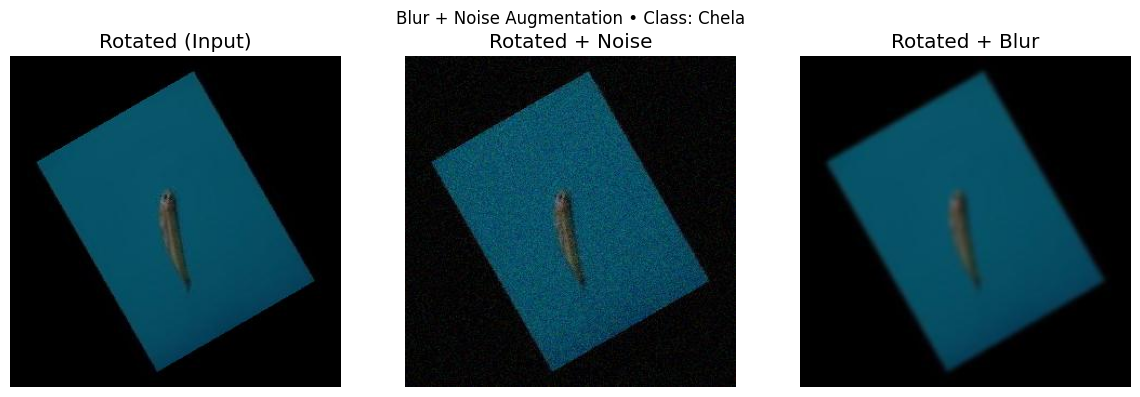

In [34]:
def show_blur_noise_example():
    # random class
    classes = [c for c in os.listdir(ROTATE_TRAIN) if os.path.isdir(os.path.join(ROTATE_TRAIN, c))]
    cls = random.choice(classes)

    # random rotated image (base)
    src_cls = os.path.join(ROTATE_TRAIN, cls)
    files = [f for f in os.listdir(src_cls) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    fname = random.choice(files)

    base, ext = os.path.splitext(fname)

    orig_path  = os.path.join(src_cls, fname)
    noise_path = os.path.join(BLURNOISE_TRAIN, cls, f"{base}_noise{ext}")
    blur_path  = os.path.join(BLURNOISE_TRAIN, cls, f"{base}_blur{ext}")

    orig  = Image.open(orig_path).convert("RGB")
    noisy = Image.open(noise_path).convert("RGB")
    blur  = Image.open(blur_path).convert("RGB")

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.imshow(orig);  plt.title("Rotated (Input)"); plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(noisy); plt.title("Rotated + Noise"); plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(blur);  plt.title("Rotated + Blur");  plt.axis("off")
    plt.suptitle(f"Blur + Noise Augmentation • Class: {cls}")
    plt.tight_layout()
    plt.show()

show_blur_noise_example()


In [35]:
import os

# Augmented dataset folder path (change it to your own)
AUG_DIR = "/kaggle/working/SmallFishBD_clean_blur_noise/train"

# Dictionary to store results
class_counts = {}

# Loop through each fish category folder
for class_name in os.listdir(AUG_DIR):
    class_path = os.path.join(AUG_DIR, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_name] = num_images

# Print results
print("Image Count per Class (After Augmentation):\n")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Total images
print("\nTotal Images:", sum(class_counts.values()))


Image Count per Class (After Augmentation):

Chela: 3040
Kata Phasa: 2060
Kachki: 3940
Mola: 2860
Bele: 3280
Nama Chanda: 1760
Guchi: 2620
Puti: 3480
Pabda: 1940
Tengra: 2120

Total Images: 27100


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train = rotated + blur + noise
train_dir = "/kaggle/working/SmallFishBD_clean_blur_noise/train"

# Val/Test = sudhu resized clean
base_clean = "/kaggle/working/SmallFishBD_clean"
val_dir   = base_clean + "/val"
test_dir  = base_clean + "/test"

img_height, img_width = 224, 224
batch_size = 32


In [39]:
# Train generator: only normalization (augmentation already file-e ache)
train_datagen = ImageDataGenerator(
    rescale=1./255
)

# Val/Test generator: only normalization
val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 27100 images belonging to 10 classes.
Found 165 images belonging to 10 classes.
Found 177 images belonging to 10 classes.


In [40]:
imgs, labels = next(train_generator)
print("Train batch shape:", imgs.shape, "min:", imgs.min(), "max:", imgs.max())


Train batch shape: (32, 224, 224, 3) min: 0.0 max: 1.0


In [41]:
# =========================================
# 0. IMPORTS
# =========================================
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, ResNet50V2, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# =========================================
# 1. DATA PATHS & GENERATORS
# =========================================
train_dir = "/kaggle/working/SmallFishBD_clean_blur_noise/train"   # train = rotated+blur+noise
val_dir   = "/kaggle/working/SmallFishBD_clean/val"                # val  = resized clean
test_dir  = "/kaggle/working/SmallFishBD_clean/test"               # test = resized clean

img_height, img_width = 224, 224
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255)
val_test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_gen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_gen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)

# =========================================
# 2. COMMON EVALUATION FUNCTION
# =========================================
def evaluate_on_test(model, name):
    print(f"\nEvaluating {name}...")
    test_loss, test_acc = model.evaluate(test_generator, verbose=0)
    print(f"{name} — Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    # predictions
    y_prob = model.predict(test_generator)
    y_pred = np.argmax(y_prob, axis=1)
    y_true = test_generator.classes

    # classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 8))   # ✔ figsize set here
    disp.plot(ax=ax, cmap="Blues", values_format="d", xticks_rotation=45)
    ax.set_title(f"Confusion Matrix — {name}")
    plt.tight_layout()
    plt.show()


TensorFlow version: 2.18.0
Found 27100 images belonging to 10 classes.
Found 165 images belonging to 10 classes.
Found 177 images belonging to 10 classes.
Classes: ['Bele', 'Chela', 'Guchi', 'Kachki', 'Kata Phasa', 'Mola', 'Nama Chanda', 'Pabda', 'Puti', 'Tengra']


I0000 00:00:1763817357.427635      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



===== MobileNetV2 SUMMARY =====


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 2,236,682 (8.53 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1763817383.478470     191 service.cc:148] XLA service 0x7d7870015910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763817383.479502     191 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763817386.844111     191 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1763817393.429020     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763817393.630867     191 gpu_timer.cc:

  1/847 ━━━━━━━━━━━━━━━━━━━━ 10:43:44 46s/step - accuracy: 0.0312 - loss: 2.5762

I0000 00:00:1763817405.128346     191 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


624/847 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.4125 - loss: 1.4745

E0000 00:00:1763817462.027251     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763817462.231132     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4534 - loss: 1.3605

847/847 ━━━━━━━━━━━━━━━━━━━━ 137s 109ms/step - accuracy: 0.4536 - loss: 1.3601 - val_accuracy: 0.0970 - val_loss: 4.2301
Epoch 2/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 66s 77ms/step - accuracy: 0.8087 - loss: 0.5110 - val_accuracy: 0.0970 - val_loss: 8.2919
Epoch 3/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.8832 - loss: 0.3148 - val_accuracy: 0.0970 - val_loss: 10.0431
Epoch 4/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9216 - loss: 0.2179

847/847 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.9216 - loss: 0.2179 - val_accuracy: 0.1455 - val_loss: 12.6424
Epoch 5/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9427 - loss: 0.1701

847/847 ━━━━━━━━━━━━━━━━━━━━ 67s 79ms/step - accuracy: 0.9427 - loss: 0.1701 - val_accuracy: 0.3091 - val_loss: 3.8229
Epoch 6/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9566 - loss: 0.1300

847/847 ━━━━━━━━━━━━━━━━━━━━ 67s 79ms/step - accuracy: 0.9566 - loss: 0.1300 - val_accuracy: 0.5333 - val_loss: 4.8545
Epoch 7/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 67s 79ms/step - accuracy: 0.9575 - loss: 0.1258 - val_accuracy: 0.2788 - val_loss: 15.9448
Epoch 8/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.9672 - loss: 0.0964 - val_accuracy: 0.2424 - val_loss: 27.0375
Epoch 9/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.9669 - loss: 0.0974 - val_accuracy: 0.3455 - val_loss: 13.1738
Epoch 10/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.9803 - loss: 0.0608 - val_accuracy: 0.1879 - val_loss: 17.8488

Evaluating MobileNetV2 (No Pretrained)...
MobileNetV2 (No Pretrained) — Test Accuracy: 0.3446, Test Loss: 3.9514
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step

Classification Report:
              precision    recall  f1-score   support

        Bele       0.88      0.33      0.48        21
       Chela       0.28      0.68      0.39        19
       Guchi    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


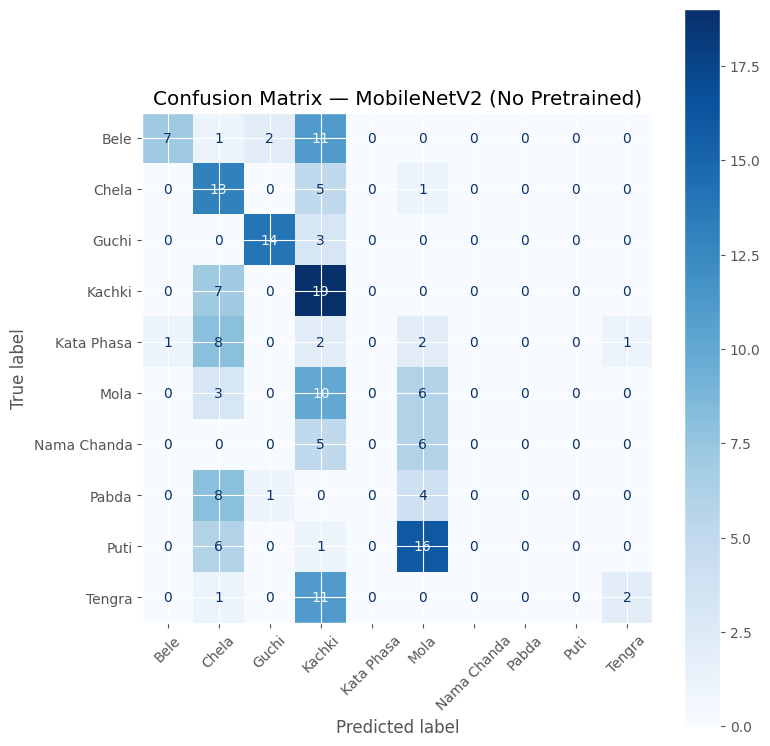

In [42]:
# =====================================================================
# 3. MODEL 1 – MobileNetV2 (weights=None, train from scratch)
# =====================================================================
base_mobilenet = MobileNetV2(
    include_top=False,
    weights=None,                  # ✔ no internet download
    input_shape=(224, 224, 3)
)
base_mobilenet.trainable = True   # full training from scratch

model_mobilenet = models.Sequential([
    base_mobilenet,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

model_mobilenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n===== MobileNetV2 SUMMARY =====")
model_mobilenet.summary()

es1 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
ckpt1 = ModelCheckpoint("mobilenetv2_best.h5", save_best_only=True,
                        monitor="val_accuracy", mode="max")

history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[es1, ckpt1]
)

evaluate_on_test(model_mobilenet, "MobileNetV2 (No Pretrained)")


===== ResNet50V2 SUMMARY =====


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,585,290 (89.97 MB)

 Trainable params: 23,539,850 (89.80 MB)

 Non-trainable params: 45,440 (177.50 KB)

Epoch 1/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.4628 - loss: 1.3413

847/847 ━━━━━━━━━━━━━━━━━━━━ 197s 175ms/step - accuracy: 0.4629 - loss: 1.3410 - val_accuracy: 0.2000 - val_loss: 13.7154
Epoch 2/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7489 - loss: 0.6374

847/847 ━━━━━━━━━━━━━━━━━━━━ 120s 141ms/step - accuracy: 0.7489 - loss: 0.6373 - val_accuracy: 0.6242 - val_loss: 1.6894
Epoch 3/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8402 - loss: 0.4233

847/847 ━━━━━━━━━━━━━━━━━━━━ 120s 142ms/step - accuracy: 0.8402 - loss: 0.4233 - val_accuracy: 0.6424 - val_loss: 2.4824
Epoch 4/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 119s 141ms/step - accuracy: 0.8945 - loss: 0.2882 - val_accuracy: 0.5758 - val_loss: 4.5971
Epoch 5/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 119s 140ms/step - accuracy: 0.9118 - loss: 0.2409 - val_accuracy: 0.6121 - val_loss: 3.1848
Epoch 6/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 119s 140ms/step - accuracy: 0.9322 - loss: 0.1805 - val_accuracy: 0.6061 - val_loss: 3.2278
Epoch 7/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9448 - loss: 0.1545

847/847 ━━━━━━━━━━━━━━━━━━━━ 120s 142ms/step - accuracy: 0.9448 - loss: 0.1545 - val_accuracy: 0.6970 - val_loss: 1.4346
Epoch 8/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 119s 140ms/step - accuracy: 0.9535 - loss: 0.1310 - val_accuracy: 0.6364 - val_loss: 2.2533
Epoch 9/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9681 - loss: 0.0956

847/847 ━━━━━━━━━━━━━━━━━━━━ 120s 141ms/step - accuracy: 0.9681 - loss: 0.0956 - val_accuracy: 0.7212 - val_loss: 1.7801
Epoch 10/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 118s 140ms/step - accuracy: 0.9650 - loss: 0.0997 - val_accuracy: 0.6545 - val_loss: 2.4723
Epoch 11/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 119s 140ms/step - accuracy: 0.9722 - loss: 0.0822 - val_accuracy: 0.6303 - val_loss: 2.6662
Epoch 12/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 119s 140ms/step - accuracy: 0.9776 - loss: 0.0672 - val_accuracy: 0.6909 - val_loss: 1.7039

Evaluating ResNet50V2 (No Pretrained)...
ResNet50V2 (No Pretrained) — Test Accuracy: 0.7062, Test Loss: 2.0494
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 660ms/step

Classification Report:
              precision    recall  f1-score   support

        Bele       0.63      0.90      0.75        21
       Chela       1.00      0.68      0.81        19
       Guchi       0.53      0.59      0.56        17
      Kachki       0.89      0.31      0.46        26
  Kata Phasa       0.48      1.00 

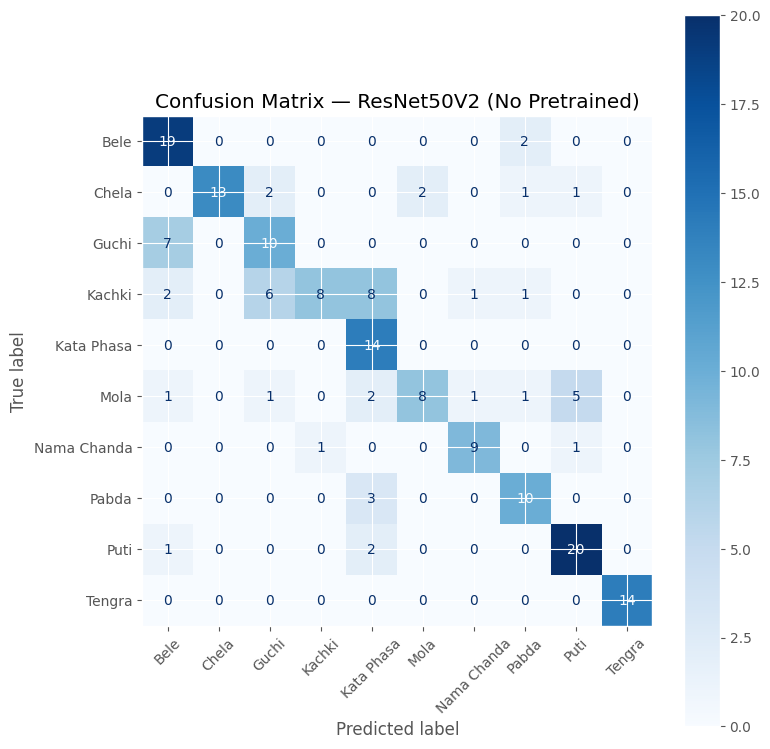

In [43]:
# =====================================================================
# 4. MODEL 2 – ResNet50V2 (weights=None)
# =====================================================================
base_resnet = ResNet50V2(
    include_top=False,
    weights=None,                  # ✔ no internet
    input_shape=(224, 224, 3)
)
base_resnet.trainable = True

model_resnet = models.Sequential([
    base_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

model_resnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n===== ResNet50V2 SUMMARY =====")
model_resnet.summary()

es2 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
ckpt2 = ModelCheckpoint("resnet50v2_best.h5", save_best_only=True,
                        monitor="val_accuracy", mode="max")

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[es2, ckpt2]
)

evaluate_on_test(model_resnet, "ResNet50V2 (No Pretrained)")




===== EfficientNetB0 SUMMARY =====


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 4,020,358 (15.34 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/20


E0000 00:00:1763819789.526492     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819789.715111     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819790.189622     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819790.396399     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819790.758330     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

466/847 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.2981 - loss: 1.8277

E0000 00:00:1763819871.635137     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819871.822953     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819872.294953     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819872.504646     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763819872.867437     191 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.3727 - loss: 1.5828

847/847 ━━━━━━━━━━━━━━━━━━━━ 199s 158ms/step - accuracy: 0.3728 - loss: 1.5823 - val_accuracy: 0.3273 - val_loss: 2.2329
Epoch 2/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7567 - loss: 0.5767

847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.7568 - loss: 0.5766 - val_accuracy: 0.4061 - val_loss: 4.9501
Epoch 3/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8954 - loss: 0.2955

847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.8955 - loss: 0.2954 - val_accuracy: 0.6121 - val_loss: 1.9811
Epoch 4/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9425 - loss: 0.1707

847/847 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.9425 - loss: 0.1707 - val_accuracy: 0.6424 - val_loss: 1.5435
Epoch 5/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9609 - loss: 0.1134 - val_accuracy: 0.5273 - val_loss: 4.4081
Epoch 6/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9701 - loss: 0.0891

847/847 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.9701 - loss: 0.0891 - val_accuracy: 0.7212 - val_loss: 1.4931
Epoch 7/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9784 - loss: 0.0607

847/847 ━━━━━━━━━━━━━━━━━━━━ 94s 110ms/step - accuracy: 0.9784 - loss: 0.0607 - val_accuracy: 0.7273 - val_loss: 1.5154
Epoch 8/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9811 - loss: 0.0573 - val_accuracy: 0.5333 - val_loss: 3.7574
Epoch 9/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9824 - loss: 0.0536 - val_accuracy: 0.5212 - val_loss: 3.8096
Epoch 10/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9832 - loss: 0.0498 - val_accuracy: 0.7152 - val_loss: 1.3967
Epoch 11/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9855 - loss: 0.0442 - val_accuracy: 0.6182 - val_loss: 2.8025
Epoch 12/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.6242 - val_loss: 2.4608
Epoch 13/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.6606 - val_loss: 2.7519
Epoch 14/20
847/847 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9871 - loss: 0.0404 

6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step

Classification Report:
              precision    recall  f1-score   support

        Bele       0.83      0.90      0.86        21
       Chela       0.90      0.47      0.62        19
       Guchi       0.93      0.76      0.84        17
      Kachki       0.60      0.96      0.74        26
  Kata Phasa       0.93      0.93      0.93        14
        Mola       0.91      0.53      0.67        19
 Nama Chanda       0.67      0.36      0.47        11
       Pabda       0.93      1.00      0.96        13
        Puti       0.79      1.00      0.88        23
      Tengra       1.00      1.00      1.00        14

    accuracy                           0.81       177
   macro avg       0.85      0.79      0.80       177
weighted avg       0.83      0.81      0.80       177



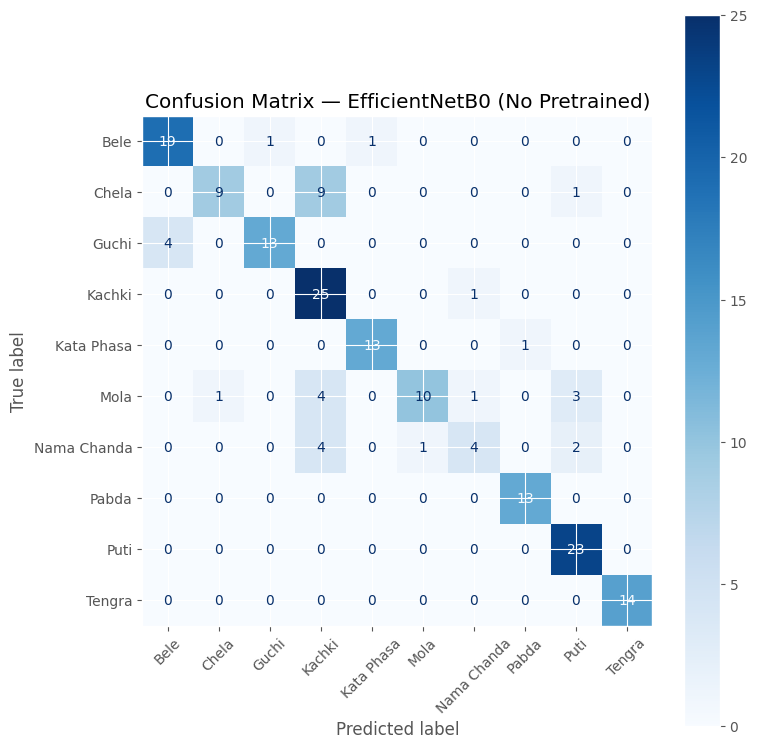

In [44]:
# =====================================================================
# 5. MODEL 3 – EfficientNetB0 (weights=None)
# =====================================================================
base_eff = EfficientNetB0(
    include_top=False,
    weights=None,                  # ✔ no internet
    input_shape=(224, 224, 3)
)
base_eff.trainable = True

model_eff = models.Sequential([
    base_eff,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

model_eff.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n===== EfficientNetB0 SUMMARY =====")
model_eff.summary()

es3 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
ckpt3 = ModelCheckpoint("efficientnetb0_best.h5", save_best_only=True,
                        monitor="val_accuracy", mode="max")

history_eff = model_eff.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[es3, ckpt3]
)

evaluate_on_test(model_eff, "EfficientNetB0 (No Pretrained)")

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np

def get_micro_auc(model):
    test_generator.reset()
    y_prob = model.predict(test_generator)
    y_true = test_generator.classes
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
    return auc(fpr, tpr)

rows = []
for mdl, name in [
    (model_mobilenet, "MobileNetV2"),
    (model_resnet,    "ResNet50V2"),
    (model_eff,       "EfficientNetB0")
]:
    loss, acc = mdl.evaluate(test_generator, verbose=0)
    auc_micro = get_micro_auc(mdl)
    rows.append({"Model": name,
                 "Test Accuracy": acc,
                 "Micro ROC AUC": auc_micro})

df_results = pd.DataFrame(rows)
print(df_results)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
            Model  Test Accuracy  Micro ROC AUC
0     MobileNetV2       0.344633       0.797933
1      ResNet50V2       0.706215       0.925490
2  EfficientNetB0       0.807910       0.976272


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


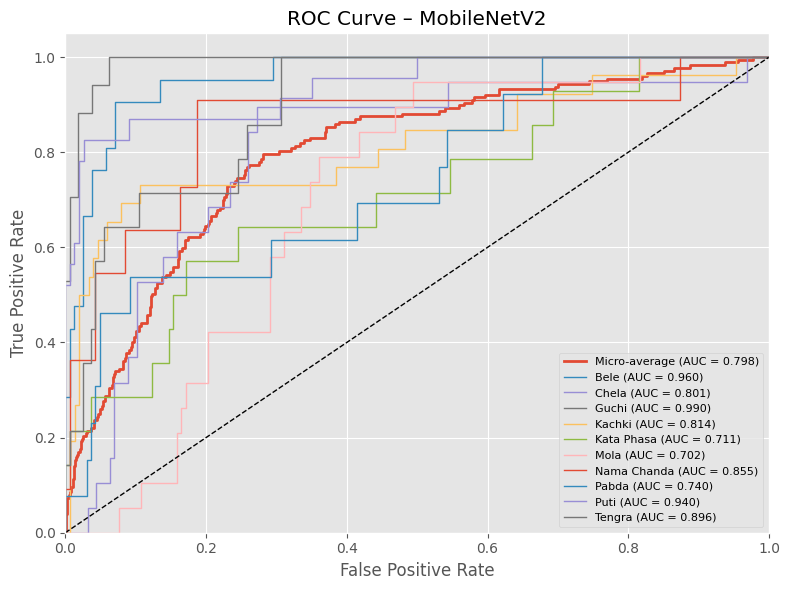

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


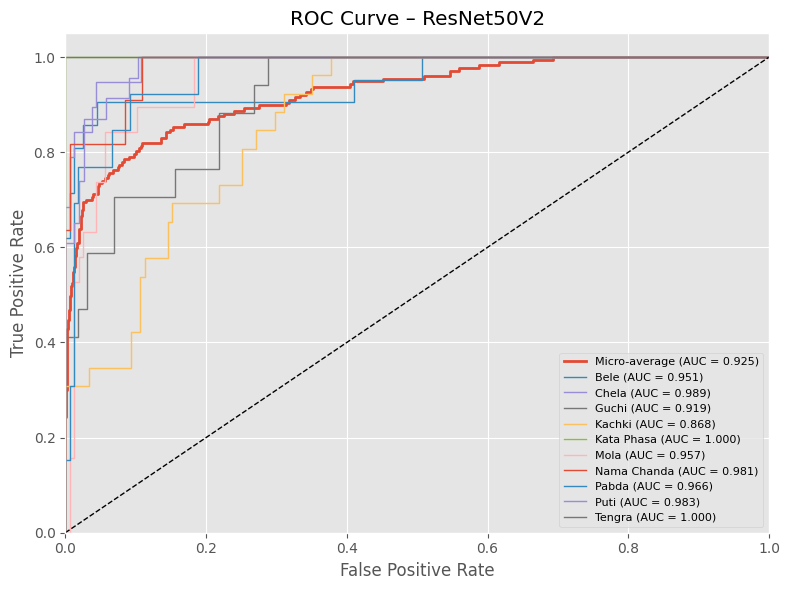

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


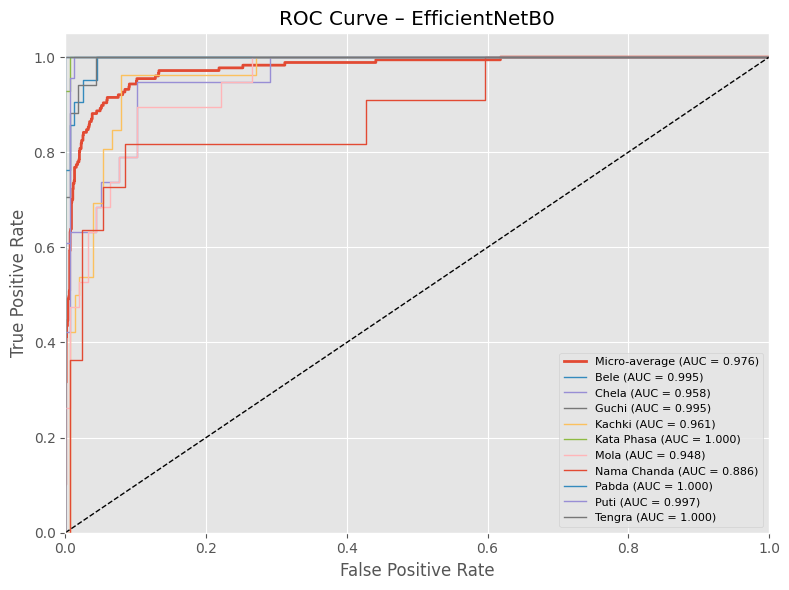

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(model, name):
    test_generator.reset()
    y_prob = model.predict(test_generator)
    y_true = test_generator.classes
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(8,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f"Micro-average (AUC = {roc_auc['micro']:.3f})", linewidth=2)

    for i, cls in enumerate(class_names):
        plt.plot(fpr[i], tpr[i], lw=1, label=f"{cls} (AUC = {roc_auc[i]:.3f})")

    plt.plot([0,1],[0,1],'k--',lw=1)
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {name}")
    plt.legend(fontsize=8, loc="lower right")
    plt.tight_layout()
    plt.show()

plot_multiclass_roc(model_mobilenet, "MobileNetV2")
plot_multiclass_roc(model_resnet,    "ResNet50V2")
plot_multiclass_roc(model_eff,       "EfficientNetB0")


In [47]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

TEST_DIR = "/kaggle/working/SmallFishBD_clean/test"

# eta already thakar kotha:
# class_names = list(train_generator.class_indices.keys())
# img_height = 224; img_width = 224


In [48]:
def predict_random_test_image(model, model_name="Model"):
    # 1) random class folder
    true_cls = random.choice(class_names)
    cls_dir = os.path.join(TEST_DIR, true_cls)

    img_files = [f for f in os.listdir(cls_dir)
                 if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    img_name = random.choice(img_files)
    img_path = os.path.join(cls_dir, img_name)

    print("True class folder:", true_cls)
    print("Image path:", img_path)

    # 2) image load + preprocess (same as generator: resize + /255)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img).astype("float32") / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # 3) prediction
    preds = model.predict(img_batch)
    pred_idx = np.argmax(preds[0])
    pred_label = class_names[pred_idx]
    confidence = preds[0][pred_idx] * 100

    print(f"\n🔮 {model_name} prediction: {pred_label} ({confidence:.2f}%)")

    # 4) show image
    plt.imshow(img_array)
    plt.title(f"Pred: {pred_label} ({confidence:.1f}%)\nTrue: {true_cls}")
    plt.axis("off")
    plt.show()


True class folder: Kachki
Image path: /kaggle/working/SmallFishBD_clean/test/Kachki/Kachki_164.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

🔮 MobileNetV2 prediction: Kachki (99.95%)


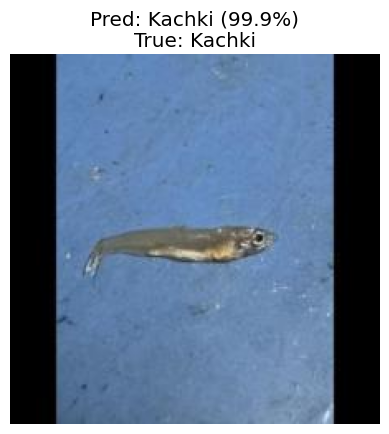

True class folder: Chela
Image path: /kaggle/working/SmallFishBD_clean/test/Chela/Chela_112.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step

🔮 ResNet50V2 prediction: Chela (54.70%)


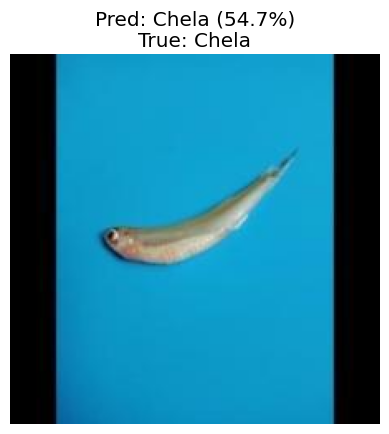

True class folder: Guchi
Image path: /kaggle/working/SmallFishBD_clean/test/Guchi/Guchi_33.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

🔮 EfficientNetB0 prediction: Guchi (99.76%)


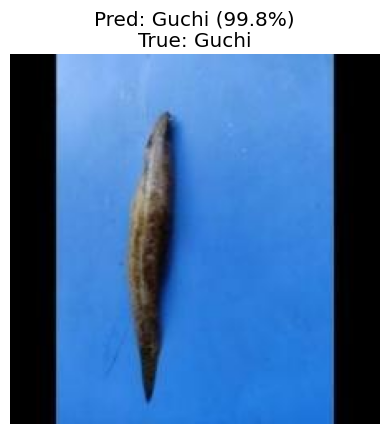

In [49]:
predict_random_test_image(model_mobilenet, "MobileNetV2")
predict_random_test_image(model_resnet,    "ResNet50V2")
predict_random_test_image(model_eff,       "EfficientNetB0")


In [50]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image

TEST_DIR = "/kaggle/working/SmallFishBD_clean/test"   # test folder
# class_names, img_height, img_width already defined earlier


In [51]:
def predict_and_gradcam_any(model, model_name="Model"):
    # ---------- 1) Random test image ----------
    true_cls = random.choice(class_names)
    cls_dir = os.path.join(TEST_DIR, true_cls)

    img_files = [f for f in os.listdir(cls_dir)
                 if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    img_name = random.choice(img_files)
    img_path = os.path.join(cls_dir, img_name)

    print("True class:", true_cls)
    print("Image path:", img_path)

    # ---------- 2) Load & preprocess ----------
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img).astype("float32") / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # ---------- 3) Normal prediction ----------
    preds = model.predict(img_batch)
    pred_idx = np.argmax(preds[0])
    pred_label = class_names[pred_idx]
    confidence = preds[0][pred_idx] * 100
    print(f"\n🔮 {model_name} prediction: {pred_label} ({confidence:.2f}%)")

    # ---------- 4) Build grad_model from scratch ----------
    # create new input tensor
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = inputs
    conv_output = None  # last 4D feature map

    for layer in model.layers:
        x = layer(x)
        # joto dure 4D output thakbe, seta conv feature map hishebe dhore rakhi
        if len(x.shape) == 4:
            conv_output = x

    if conv_output is None:
        raise ValueError("Model e kono 4D feature map paoya gelo na.")

    grad_model = tf.keras.models.Model(inputs=inputs,
                                       outputs=[conv_output, x])

    # ---------- 5) Forward + backward for Grad-CAM ----------
    img_tensor = tf.convert_to_tensor(img_batch)

    with tf.GradientTape() as tape:
        conv_out, preds_gc = grad_model(img_tensor)
        pred_idx_gc = tf.argmax(preds_gc[0])
        class_score = preds_gc[:, pred_idx_gc]

    grads = tape.gradient(class_score, conv_out)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_out = conv_out[0]               # (H, W, C)
    heatmap = conv_out @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # normalize 0–1
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    heatmap = heatmap.numpy()

    # ---------- 6) Resize & overlay ----------
    heatmap_resized = cv2.resize(heatmap, (224, 224))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)

    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    overlay = 0.4 * heatmap_color + (img_array * 255.0)

    # ---------- 7) Plot side-by-side ----------
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_array)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized, cmap="jet")
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(np.uint8(overlay))
    plt.title(f"{model_name}\nPred: {pred_label} ({confidence:.1f}%)\nTrue: {true_cls}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


True class: Pabda
Image path: /kaggle/working/SmallFishBD_clean/test/Pabda/Pabda_60.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

🔮 MobileNetV2 prediction: Chela (96.57%)


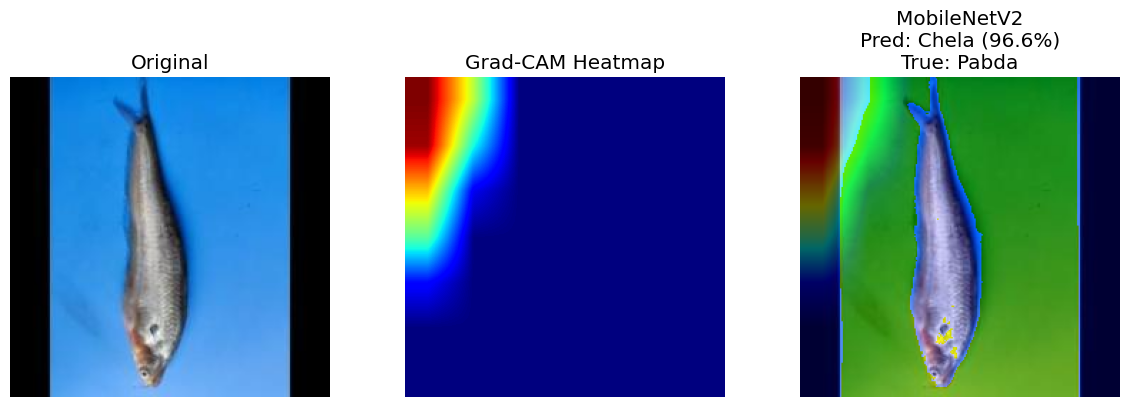

True class: Mola
Image path: /kaggle/working/SmallFishBD_clean/test/Mola/Mola_55.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

🔮 ResNet50V2 prediction: Bele (44.62%)


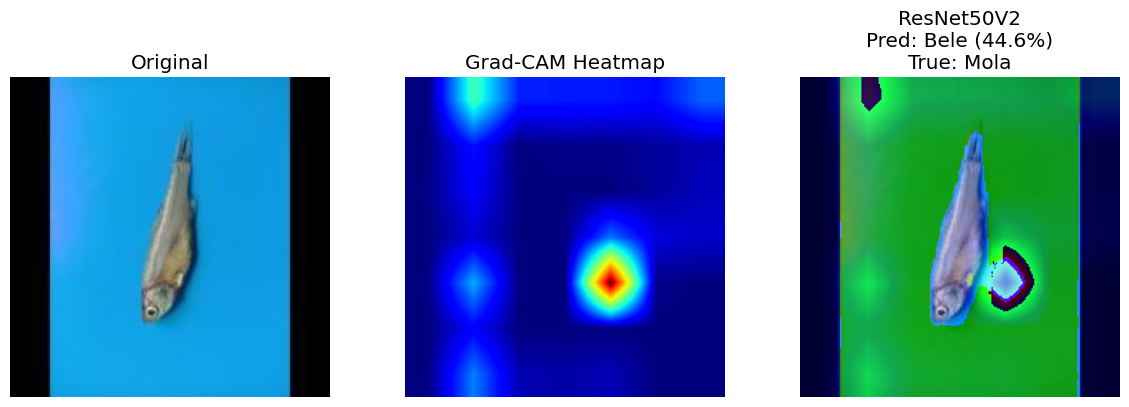

True class: Tengra
Image path: /kaggle/working/SmallFishBD_clean/test/Tengra/Tengra_8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

🔮 EfficientNetB0 prediction: Tengra (100.00%)


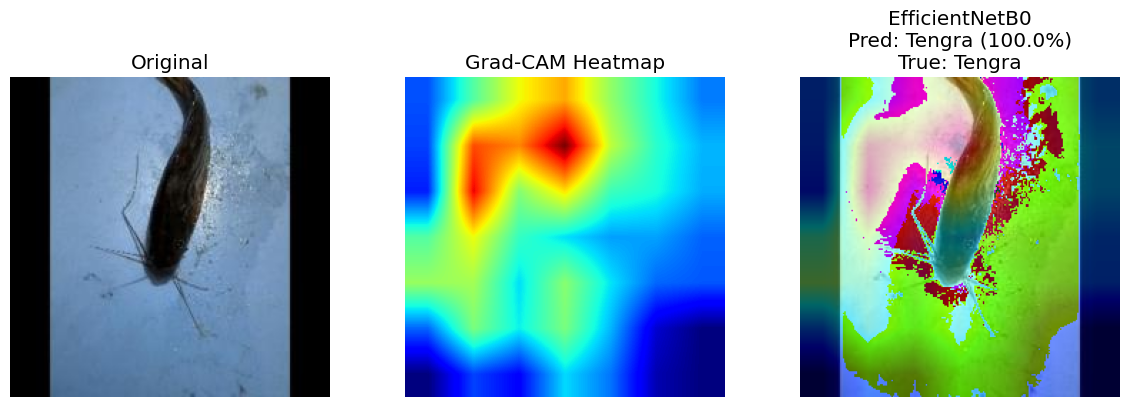

In [68]:
predict_and_gradcam_any(model_mobilenet, "MobileNetV2")
predict_and_gradcam_any(model_resnet,    "ResNet50V2")
predict_and_gradcam_any(model_eff,       "EfficientNetB0")
